Load library

In [1]:
from clean import data_preprocessing
import numpy as np
import pandas as pd

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D,GlobalMaxPool1D, MaxPool2D, Dense, Activation, Embedding, Input
from tensorflow.keras.layers import ReLU, Flatten
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


[nltk_data] Downloading package wordnet to /home/zoez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zoez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

Read datasets

In [3]:
df = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
# Combine the features Title and Abstract into one
df['News'] = df['Title'].str.cat(df['Abstract'],sep=" ")
test['News'] = test['Title'].str.cat(test['Abstract'],sep=" ")
# Drop all rows that contain NaN under those columns
df.dropna(subset = ["News"], inplace=True)
test.dropna(subset = ["News"], inplace=True)
print('Length of the training dataset ', len(df))
df.head()


Length of the training dataset  77100


,NewID,Category,Title,Abstract,News
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","The Brands Queen Elizabeth, Prince Charles, an..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,Walmart Slashes Prices on Last-Generation iPad...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,50 Worst Habits For Belly Fat These seemingly ...
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,The Cost of Trump's Aid Freeze in the Trenches...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",I Was An NBA Wife. Here's How It Affected My M...


In [4]:
df['clean-News'] = [data_preprocessing(line) for line in df['News']]
test['clean-News'] = [data_preprocessing(line) for line in test['News']]
df.head()

,NewID,Category,Title,Abstract,News,clean-News
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","The Brands Queen Elizabeth, Prince Charles, an...",brand queen elizabeth prince charles prince ph...
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,Walmart Slashes Prices on Last-Generation iPad...,walmart slash price last generation ipads appl...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,50 Worst Habits For Belly Fat These seemingly ...,worst habit belly fat seemingly harmless habi...
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,The Cost of Trump's Aid Freeze in the Trenches...,cost trumpaid freeze trench ukrainewar lt ivan...
5,N75236,health,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",I Was An NBA Wife. Here's How It Affected My M...,nba wife hereaffect mental health felt like fr...


In [5]:
x_clean_news_train = df['clean-News'].values
x_clean_news_test = test['clean-News'].values
x_fit=np.concatenate((x_clean_news_train,x_clean_news_test))

clean_news_vectorize = CountVectorizer()
clean_news_vectorize.fit(x_fit)
#tf train matrix
x_clean_news_train_tf = clean_news_vectorize.transform(x_clean_news_train)
print(x_clean_news_train_tf.shape)

tfidf_transformer = TfidfVectorizer()
tfidf_transformer.fit(x_fit)
#tf-idf train matrix
x_clean_news_train_tfidf = tfidf_transformer.transform(x_clean_news_train)
print(x_clean_news_train_tfidf.shape)


(77100, 113722)
(77100, 113722)


In [6]:
#tf test matrix
x_clean_news_test_tf = clean_news_vectorize.transform(x_clean_news_test)
print(x_clean_news_test_tf.shape)

#tf-idf test matrix
x_clean_news_test_tfidf = tfidf_transformer.transform(x_clean_news_test)
print(x_clean_news_test_tfidf.shape)


(19012, 113722)
(19012, 113722)


In [7]:
y_train = df['Category'].values
y_test = test['Category'].values
y_fit=np.concatenate((y_train,y_test))
encoder = LabelEncoder()
encoder.fit(y_fit)

encoded_Y = encoder.transform(y_train)
y_train = to_categorical(encoded_Y)
print(y_train.shape)

(77100, 18)


In [8]:
encoded_Y_test = encoder.transform(y_test)
y_test = to_categorical(encoded_Y_test)
print(y_test.shape)

(19012, 18)


fully connected dence neural network

50 nodes -- 72%

128 nodes -- 73%

256 nodes -- 73%

In [9]:
tf_model = Sequential()
tf_model.add(Dense(128, input_shape=(x_clean_news_train_tf.shape[1],), activation='relu'))
tf_model.add(Dense(18, activation='softmax'))
# Compile model
tf_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tf_model.fit(x_clean_news_train_tf,y_train, epochs=10, verbose=2)

2022-04-25 21:18:19.937095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 21:18:20.002148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 21:18:20.003751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 21:18:20.008209: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the 

Epoch 1/10


/home/zoez/.conda/envs/gpu/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
2022-04-25 21:18:23.733180: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2410/2410 - 22s - loss: 0.8912 - accuracy: 0.7333
Epoch 2/10
2410/2410 - 21s - loss: 0.3243 - accuracy: 0.8939
Epoch 3/10
2410/2410 - 21s - loss: 0.1215 - accuracy: 0.9636
Epoch 4/10
2410/2410 - 21s - loss: 0.0566 - accuracy: 0.9849
Epoch 5/10
2410/2410 - 21s - loss: 0.0383 - accuracy: 0.9914
Epoch 6/10
2410/2410 - 21s - loss: 0.0298 - accuracy: 0.9936
Epoch 7/10
2410/2410 - 21s - loss: 0.0253 - accuracy: 0.9944
Epoch 8/10
2410/2410 - 21s - loss: 0.0222 - accuracy: 0.9953
Epoch 9/10
2410/2410 - 21s - loss: 0.0206 - accuracy: 0.9953
Epoch 10/10
2410/2410 - 21s - loss: 0.0181 - accuracy: 0.9956


In [10]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               14556544  
_________________________________________________________________
dense_1 (Dense)              (None, 18)                2322      
Total params: 14,558,866
Trainable params: 14,558,866
Non-trainable params: 0
_________________________________________________________________


In [11]:
# evaluate
loss, acc = tf_model.evaluate(x_clean_news_test_tf, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 73.379970


In [12]:
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

predicted_tf=tf_model.predict(x_clean_news_test_tf)

print(metrics.classification_report(np.argmax(y_test,axis=-1), np.argmax(predicted_tf,axis=-1),target_names=None))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       436
           1       0.53      0.38      0.44       111
           2       0.56      0.53      0.54      1064
           3       0.68      0.76      0.72       731
           5       0.65      0.49      0.56       417
           6       0.00      0.00      0.00        16
           7       0.35      0.35      0.35       587
           9       0.65      0.47      0.55       127
          10       0.78      0.63      0.70       278
          11       0.69      0.79      0.74      6076
          12       0.00      0.00      0.00         1
          13       0.94      0.94      0.94      6090
          14       0.47      0.38      0.42       951
          15       0.52      0.34      0.41       227
          16       0.50      0.34      0.40      1086
          17       0.77      0.67      0.72       814

    accuracy                           0.73     19012
   macro avg       0.54   

/home/zoez/.conda/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zoez/.conda/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zoez/.conda/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['sports' 'news' 'sports' ... 'sports' 'finance' 'sports']


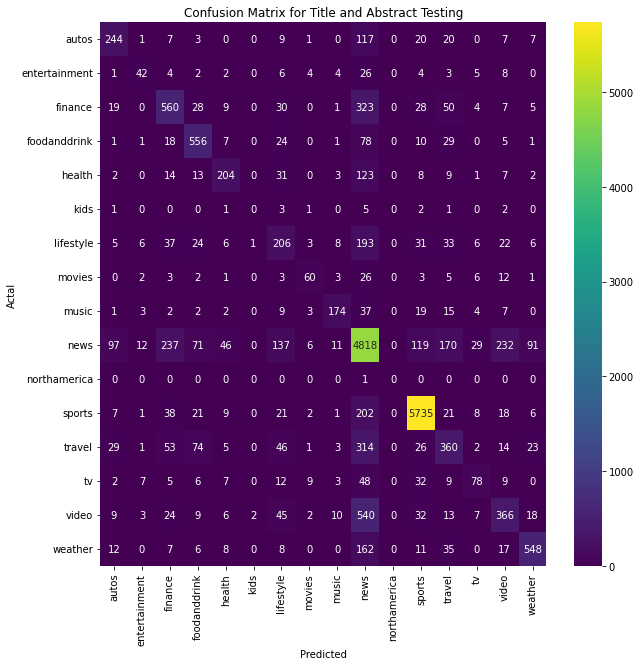

In [25]:
#label=np.unique(y_fit)
label=np.unique(encoder.inverse_transform(encoded_Y_test))
#test['Category'].unique()
print(encoder.inverse_transform(encoded_Y_test))
import matplotlib.pyplot as plt
#import product
import seaborn as sns

c_m = confusion_matrix(np.argmax(y_test,axis=-1), np.argmax(predicted_tf,axis=-1),labels=np.unique(encoded_Y_test))

#Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(c_m, label, label), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix for Title and Abstract Testing')
plt.ylabel('Actal')
plt.xlabel('Predicted')
plt.show()

fully connected dence neural network with 2 dense layers

In [36]:
tf_model2 = Sequential()
tf_model2.add(Dense(64, input_shape=(x_clean_news_train_tf.shape[1],), activation='relu'))
tf_model2.add(Dense(64, activation='relu'))
tf_model2.add(Dense(18, activation='softmax'))
# Compile model
tf_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tf_model2.fit(x_clean_news_train_tf,y_train,epochs=10, verbose=2)




Epoch 1/10


/home/zoez/.conda/envs/gpu/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_10/dense_24/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_10/dense_24/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_10/dense_24/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2410/2410 - 15s - loss: 0.9080 - accuracy: 0.7261
Epoch 2/10
2410/2410 - 15s - loss: 0.3542 - accuracy: 0.8823
Epoch 3/10
2410/2410 - 14s - loss: 0.1358 - accuracy: 0.9561
Epoch 4/10
2410/2410 - 14s - loss: 0.0637 - accuracy: 0.9813
Epoch 5/10
2410/2410 - 14s - loss: 0.0401 - accuracy: 0.9890
Epoch 6/10
2410/2410 - 14s - loss: 0.0304 - accuracy: 0.9920
Epoch 7/10
2410/2410 - 14s - loss: 0.0237 - accuracy: 0.9936
Epoch 8/10
2410/2410 - 14s - loss: 0.0207 - accuracy: 0.9943
Epoch 9/10
2410/2410 - 14s - loss: 0.0171 - accuracy: 0.9947
Epoch 10/10
2410/2410 - 14s - loss: 0.0145 - accuracy: 0.9951


In [37]:
print(tf_model2.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                7278272   
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 18)                1170      
Total params: 7,283,602
Trainable params: 7,283,602
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# evaluate
loss, acc = tf_model2.evaluate(x_clean_news_test_tf, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))


predicted_tf2=tf_model2.predict(x_clean_news_test_tf)

print(metrics.classification_report(np.argmax(y_test,axis=-1), np.argmax(predicted_tf2,axis=-1),target_names=None))

Test Accuracy: 71.407533
              precision    recall  f1-score   support

           0       0.50      0.64      0.56       436
           1       0.43      0.47      0.45       111
           2       0.48      0.57      0.52      1064
           3       0.71      0.68      0.69       731
           5       0.50      0.61      0.55       417
           6       0.06      0.06      0.06        16
           7       0.31      0.39      0.35       587
           9       0.60      0.48      0.54       127
          10       0.79      0.61      0.69       278
          11       0.72      0.70      0.71      6076
          12       0.00      0.00      0.00         1
          13       0.93      0.94      0.93      6090
          14       0.41      0.40      0.40       951
          15       0.43      0.35      0.39       227
          16       0.51      0.39      0.44      1086
          17       0.71      0.69      0.70       814

    accuracy                           0.71     19012
 

/home/zoez/.conda/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zoez/.conda/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zoez/.conda/envs/gpu/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TFIDF NN MODEL DOESN'T WORK DUE TO LACK OF MEMORY!!!

In [18]:
tfidf_model = Sequential()
tfidf_model.add(Dense(50, input_shape=(x_clean_news_train_tfidf.shape[1],), activation='relu'))
tfidf_model.add(Dense(18, activation='softmax'))
# Compile model
tfidf_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tfidf_model.fit(x_clean_news_train_tfidf.toarray(),y_train,epochs=10, verbose=2)

MemoryError: Unable to allocate 65.3 GiB for an array with shape (77100, 113722) and data type float64

In [ ]:
tfidf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5686150   
                                                                 
 dense_1 (Dense)             (None, 18)                918       
                                                                 
Total params: 5,687,068
Trainable params: 5,687,068
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate
loss, acc = tfidf_model.evaluate(x_clean_news_test_tfidf, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

In [ ]:
predicted_tfidf=tfidf_model.predict(x_clean_news_test_tfidf)

print(metrics.classification_report(np.argmax(y_test,axis=-1), np.argmax(predicted_tfidf,axis=-1),target_names=None))